# Digital Assignment 1

Submitted by: Prateek Singh( 15BCE1091) 
<br>
<br>
The dataset used in this experiment is ionosphere dataset from UCI Machine learning repository. 

## Dataset Description
This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. 
The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. 
"Bad" returns are those that do not; their signals pass through the ionosphere. 

The different regularization algos applied in this experiment are:
<li>L1 (Lasso) Regularization</li>
<li>L2 (Ridge) Regularizatoin</li>
<li>Elastic Net</li>
<li>LARS-Lasso</li>
<li>AIC</li>
<li>BIC</li>
<li>Orthogonal Matching Pursuit</li>



In [22]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import LassoLars, LassoLarsIC

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('Dataset/ionosphere.csv', header=None)
data.head()

0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9  ...       25       26       27       28       29       30       31  \
0  0.03760 ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487   
1 -0.04549 ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288   
2  0.01198 ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436 -0.24180   
3  0.00000 ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682  1.00000   
4 -0.16399 ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707 -0.59573   

        32       33  34  
0  0.18641 -0.45300   g  
1 -0.13738 -0.02447   b  
2  0.56045 -0.38238   g  
3 -0.32382  1.00000   b  
4 -0.04608 -0.65697   g  

[5 rows x 35 columns]

Next let's check to total number of classes the dataset is divided into, although in this case we are already given that in the description of the dataset.

In [7]:
classes = sorted(data.iloc[:, 34].unique())

print("Number of data points for class: \n")

for cls in classes:
    num_samples = len(data.loc[data.iloc[:, 34] == cls])
    print(cls, " :", num_samples)

Number of data points for class: 

b  : 126
g  : 225


#### Next we try to vizualize the dataset, however since the dataset is 33 dimensional we have to reduce the dimensions in order to be able to effectively project the dataset and visualize it.

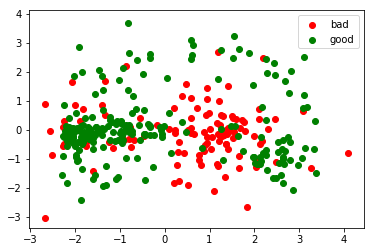

In [8]:
pca = PCA(n_components=2)

transformed_data = pd.DataFrame(pca.fit_transform(data.iloc[:, :34]))
Y = pd.Series.to_frame(data.iloc[:, 34])

plt.scatter(transformed_data.loc[list(Y.loc[Y[34] == 'b'].index)][0], transformed_data.loc[list(Y.loc[Y[34] == 'b'].index)][1], label='bad', c='red')
plt.scatter(transformed_data.loc[list(Y.loc[Y[34] == 'g'].index)][0], transformed_data.loc[list(Y.loc[Y[34] == 'g'].index)][1], label='good', c='green')

plt.legend()
plt.show()

#### We use the train_test_split function by sklearn to split the dataset between training and testing data such that 10% of the data is for testing purposes.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :34], 
                                                     data.iloc[:, 34], 
                                                     test_size=0.1, 
                                                     random_state=42)

Y_train = pd.Series.to_frame(Y_train)
Y_test = pd.Series.to_frame(Y_test)

print("Size of training set: ", len(X_train.axes[0]))
print("Size of test set: ", len(X_test.axes[0]))

Size of training set:  315
Size of test set:  36


In [10]:
X_train.head()

0   1        2        3        4        5        6        7        8   \
42    1   0  0.90932  0.08791  0.86528  0.16888  1.00000  0.16598  0.55187   
30    1   0  1.00000 -0.14236  1.00000 -0.16256  1.00000 -0.23656  1.00000   
208   1   0 -0.00641 -0.50000  0.00000  0.00000 -0.01923  1.00000  0.00000   
310   1   0  0.93658  0.35107  0.75254  0.65640  0.45571  0.88576  0.15323   
113   1   0  1.00000  0.23395  0.91404  0.52013  0.78020  0.72144  0.47660   

          9    ...          24       25       26       27       28       29  \
42   0.68154   ...     0.24856  0.56527  0.18626  0.56605  0.12635  0.56101   
30  -0.07514   ...     1.00000 -0.47643  0.98820 -0.49687  1.00000 -0.75820   
208  0.00000   ...     0.00000  0.00000 -0.61538 -0.51282  0.00000  0.00000   
310  0.95776   ...    -0.36799 -0.84951 -0.04578 -0.91221  0.27330 -0.85762   
113  0.84222   ...    -0.70838  0.03591 -0.71731 -0.11943 -0.64962 -0.28183   

          30       31       32       33  
42   0.06927  0.55061  0.12137  0.67739  
30   1.00000 -0.75761  1.00000 -0.84437  
208  0.00000  0.00000  0.00000  0.00000  
310  0.54827 -0.69613  0.74828 -0.44173  
113 -0.51251 -0.44505 -0.37432 -0.53319  

[5 rows x 34 columns]

In [11]:
le = LabelEncoder()
le.fit(Y_train)
le.classes_
Y_train = pd.DataFrame(le.transform(Y_train), index=Y_train.index, columns=Y_train.columns)
Y_test = pd.DataFrame(le.transform(Y_test), index=Y_test.index, columns=Y_test.columns)
Y_train.head()


/usr/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34
42    1
30    1
208   0
310   1
113   1

#### We use a vanilla logistic regression without any regularization with which we achieve and accuracy of 92.7%

In [14]:
model_l1 = LogisticRegression(solver='saga', max_iter=10000, multi_class='multinomial')
model_l1.fit(X_train, Y_train)

print("Train Score: ", model_l1.score(X_train, Y_train))
print("Test Score: ", model_l1.score(X_test, Y_test), '\n')

Y_pred = model_l1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.926984126984127
Test Score:  0.8333333333333334 

[[ 9  6]
 [ 0 21]]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using logistic regression with L1 regularization

In [15]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial')
model_l1.fit(X_train, Y_train)

print("Train Score: ", model_l1.score(X_train, Y_train))
print("Test Score: ", model_l1.score(X_test, Y_test), '\n')

Y_pred = model_l1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.9142857142857143
Test Score:  0.8333333333333334 

[[ 9  6]
 [ 0 21]]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using logistic regression with L2 regularization

In [17]:
model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial')
model_l2.fit(X_train, Y_train)

print("Train Score: ", model_l2.score(X_train, Y_train))
print("Test Score: ", model_l2.score(X_test, Y_test), '\n')

Y_pred = model_l2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


Train Score:  0.926984126984127
Test Score:  0.8333333333333334 

[[ 9  6]
 [ 0 21]]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using Elastic Net

In [106]:
model_v3 = ElasticNet(random_state=0)
model_v3.fit(X_train, Y_train)

print("Train Score: ", model_v3.score(X_train, Y_train))
print("Test Score: ", model_v3.score(X_test, Y_test), '\n')

Y_pred = model_v3.predict(X_test)
Y_pred = Y_pred.astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.0
Test Score:  -0.01700291545189514 

[[15  0]
 [21  0]]


In [107]:
model_v4 = LassoLars(alpha=0.01)
model_v4.fit(X_train, Y_train)

print("Train Score: ", model_v4.score(X_train, Y_train))
print("Test Score: ", model_v4.score(X_test, Y_test), '\n')

Y_pred = model_v4.predict(X_test)
Y_pred = Y_pred.astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.20716869380731406
Test Score:  0.18172349343699712 

[[15  0]
 [21  0]]


Using AIC regularization

In [20]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, Y_train)
alpha_aic_ = model_aic.alpha_

print("Train Score: ", model_aic.score(X_train, Y_train))
print("Test Score: ", model_aic.score(X_test, Y_test), '\n')

Y_pred = model_aic.predict(X_test)
Y_pred = Y_pred.astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.53682743360097
Test Score:  0.4201768645178431 

[[15  0]
 [21  0]]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using BIC regularization

In [21]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_train, Y_train)
alpha_bic_ = model_aic.alpha_

print("Train Score: ", model_bic.score(X_train, Y_train))
print("Test Score: ", model_bic.score(X_test, Y_test), '\n')

Y_pred = model_bic.predict(X_test)
Y_pred = Y_pred.astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.5256014573187816
Test Score:  0.42136955872651527 

[[15  0]
 [21  0]]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using the Orthogonal Matching Pursuit

In [24]:
model_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=33)
model_omp.fit(X_train, Y_train)
coef = model_omp.coef_

print("Train Score: ", model_omp.score(X_train, Y_train))
print("Test Score: ", model_omp.score(X_test, Y_test), '\n')

Y_pred = model_omp.predict(X_test)
Y_pred = Y_pred.astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.6376814190887808
Test Score:  0.35222528616415316 

[[14  1]
 [19  2]]
